# Ridge Regression and Lasso

This notebook explores ridge regression and lasso. These alternative linear fitting techniques can improve a model's performance and interpretability.

## Import libraries 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Exploratory Data Analysis 

In [2]:
DATAPATH = 'train.csv'

data = pd.read_csv(DATAPATH)
data.head()

,ID,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00


In [3]:
data.drop(['ID'], axis=1, inplace=True)

In [4]:
data.head()

,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00


In [5]:
data.columns

Index(['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi',
       'Berat', 'Layar', 'Harga'],
      dtype='object')

In [6]:
data

,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar,Harga
0,Pulse,NaN,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.4kg,13.3inch IPS Panel Full HD 1920x1080,16258268.00
1,Pulse,Notebook,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Gemini 2,2.32kg,15.6inch Full HD 1920x1080,14133900.00
2,Zenith,2 in 1 Convertible,NaN,8GB,256GB SSD,Intel HD Graphics 520,Gemini 5,1.6kg,13.3inch IPS Panel Full HD / Touchscreen 1920x...,13517319.32
3,Vivid,Notebook,NaN,4GB,500GB HDD,Intel HD Graphics 400,No OS,1.86kg,15.6inch 1366x768,4437188.00
4,Zenith,Notebook,Intel Core i3 6006U 2GHz,NaN,500GB HDD,Nvidia GeForce GTX 940MX,Gemini 5,2.2kg,15.6inch 1366x768,8034908.00
...,...,...,...,...,...,...,...,...,...,...
1037,Pulse,Notebook,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Nvidia Quadro M2200M,Gemini 5,2.67kg,15.6inch Full HD 1920x1080,35805880.00
1038,Stellar,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 500,Gemini 5,2kg,15.6inch 1366x768,5208128.00
1039,Vivid,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.28kg,13.3inch Full HD / Touchscreen 1920x1080,39009564.00
1040,Stellar,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Gemini 5,1.63kg,14.0inch 1366x768,5122468.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          1042 non-null   object 
 1   Tipe           979 non-null    object 
 2   CPU            948 non-null    object 
 3   RAM            1011 non-null   object 
 4   Memori         1042 non-null   object 
 5   GPU            979 non-null    object 
 6   SistemOperasi  1011 non-null   object 
 7   Berat          1042 non-null   object 
 8   Layar          1042 non-null   object 
 9   Harga          1042 non-null   float64
dtypes: float64(1), object(9)
memory usage: 81.5+ KB


In [8]:
data.describe()

,Harga
count,1.042000e+03
mean,1.919699e+07
std,1.186602e+07
min,2.980968e+06
25%,1.026207e+07
50%,1.666944e+07
75%,2.545520e+07
max,1.044881e+08


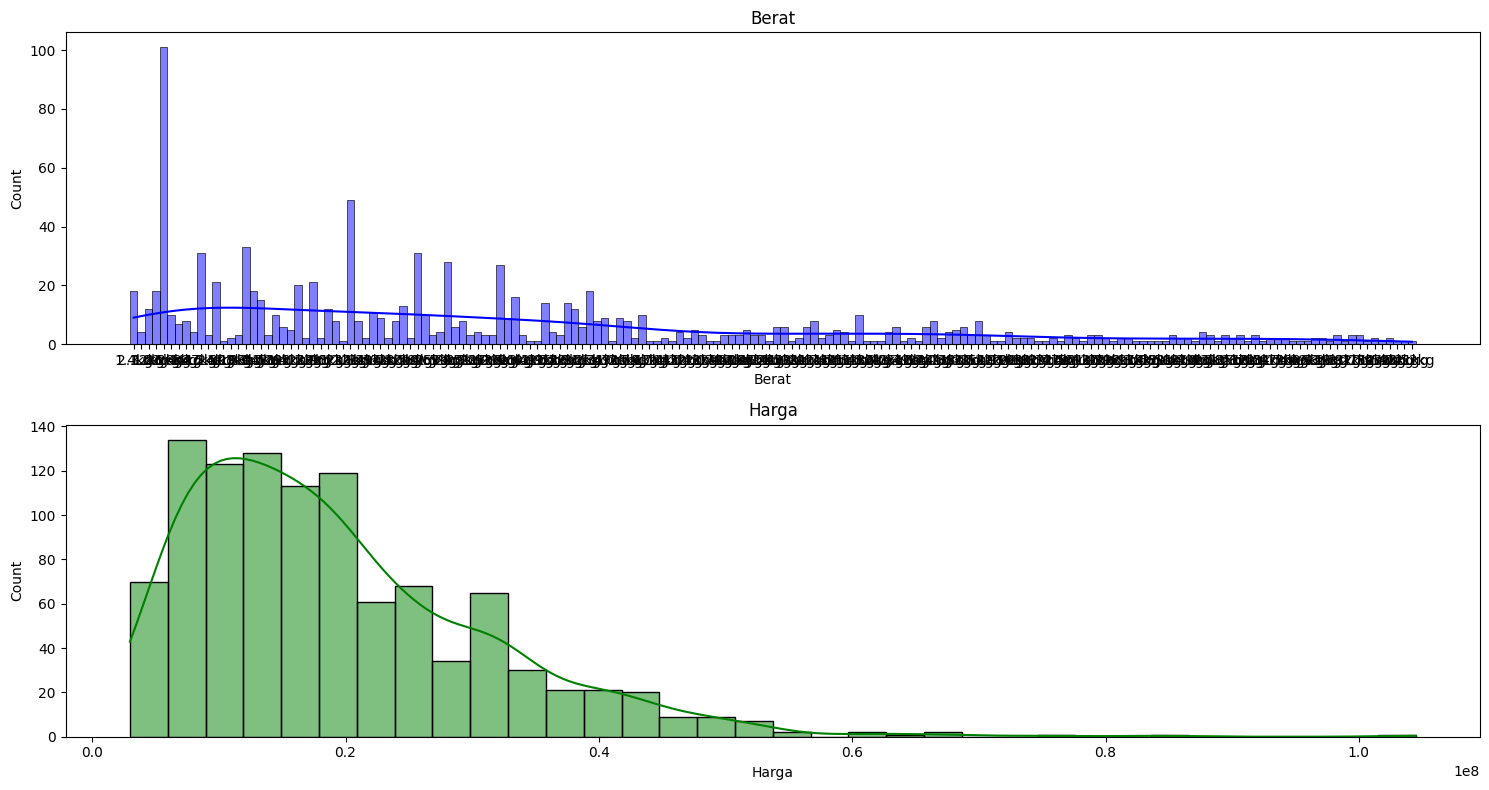

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))  # Create a 3x3 grid of subplots

# Plot histograms using Seaborn on each subplot
sns.histplot(data['Berat'], kde=True, ax=axes[0], color='blue')
sns.histplot(data['Harga'], kde=True, ax=axes[1], color='green')

# Customize subplot titles
axes[0].set_title('Berat')
axes[1].set_title('Harga')


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


## Preprocessing

### Encoding all categorical feature

In [10]:
categorical_columns = ['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar']
for column in categorical_columns:
    data[column] = data[column].fillna('Unknown')

In [11]:
data['Berat'] = data['Berat'].str.extract('(\d+\.?\d*)').astype(float) # Extract numbers including decimals
data['RAM'] = data['RAM'].str.extract('(\d+\.?\d*)').astype(float) # Extract numbers including decimals

In [12]:
df = pd.DataFrame(data)

# Applying one-hot encoding
data = pd.get_dummies(df, columns=['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Columns: 377 entries, Berat to Layar_18.4inch Full HD 1920x1080
dtypes: bool(375), float64(2)
memory usage: 398.0 KB


In [14]:
data.describe()

,Berat,Harga
count,1042.000000,1.042000e+03
mean,2.038981,1.919699e+07
std,0.667347,1.186602e+07
min,0.690000,2.980968e+06
25%,1.500000,1.026207e+07
50%,2.040000,1.666944e+07
75%,2.300000,2.545520e+07
max,4.700000,1.044881e+08


In [15]:
harga = data['Harga'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler_harga = StandardScaler()

# Fit the scaler to the 'Harga' column and transform it
harga_scaled = scaler_harga.fit_transform(harga)

# Replace the original 'Harga' column with the scaled version, if desired
# Or use the scaled 'Harga' in your model as the target variable
data['Harga'] = harga_scaled

Berat = data['Berat'].values.reshape(-1, 1)
# Initialize the StandardScaler
scaler_Berat = StandardScaler()

# Fit the scaler to the 'Berat' column and transform it
Berat_scaled = scaler_harga.fit_transform(Berat)

# Replace the original 'Berat' column with the scaled version, if desired
# Or use the scaled 'Berat' in your model as the target variable
data['Berat'] = Berat_scaled

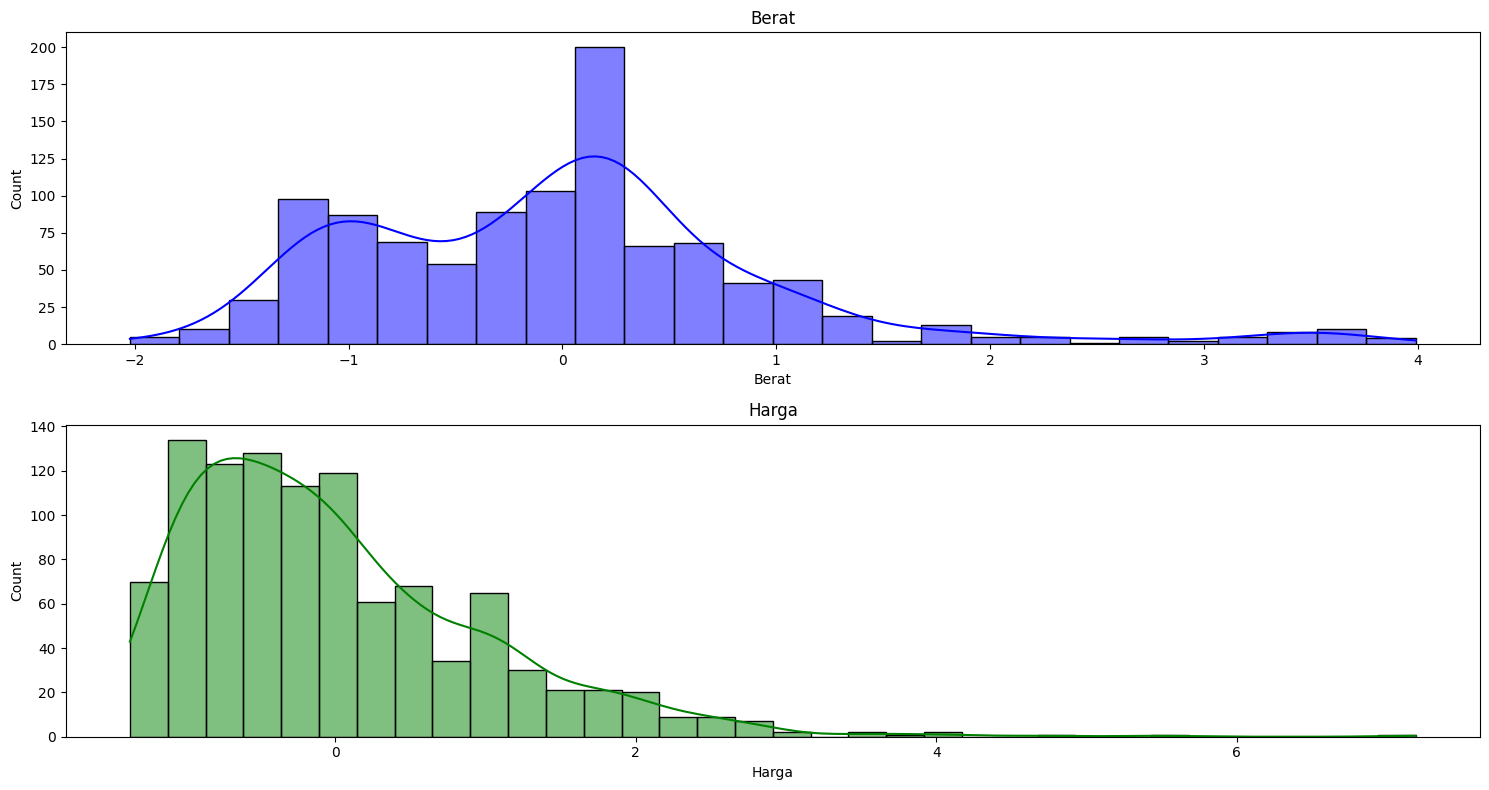

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))  # Create a 3x3 grid of subplots

# Plot histograms using Seaborn on each subplot
sns.histplot(data['Berat'], kde=True, ax=axes[0], color='blue')
sns.histplot(data['Harga'], kde=True, ax=axes[1], color='green')

# Customize subplot titles
axes[0].set_title('Berat')
axes[1].set_title('Harga')


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# And assuming the 'Harga' column exists in 'data'

min_value_price = 0.0   # Example minimum value
max_value_price = 0.6 * 100000000 # Example maximum value

# Correcting the approach to clamp values in the 'Harga' column
data['Harga'] = data['Harga'].clip(lower=min_value_price, upper=max_value_price)


## Modelling 

### Ridge regression 

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Xs = data.drop(['Harga'], axis=1)
y = data['Harga'].values.reshape(-2,1)

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [19]:
ridge_regressor.best_params_

{'alpha': 1}

In [20]:
ridge_regressor.best_score_

-0.1613409638506683

In [21]:
neg_mse_scores1 = cross_val_score(ridge_regressor, Xs, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -neg_mse_scores1
rmse_scores = np.sqrt(mse_scores)

print(rmse_scores)

[0.3873312  0.45741429 0.39889192 0.33813708 0.41713317]


# Predicting The Test set


## processing the test data

In [22]:
DATAPATH_test = 'test.csv'

data_test = pd.read_csv(DATAPATH_test)
data_test.head()

,ID,Brand,Tipe,CPU,RAM,Memori,GPU,SistemOperasi,Berat,Layar
0,0,Pulse,Gaming,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Gemini 5,4.6kg,17.3inch IPS Panel Full HD 1920x1080
1,1,Vivid,Notebook,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,15.6inch 1366x768
2,2,Eclipse,Notebook,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Gemini 5,2.2kg,15.6inch 1366x768
3,3,Orbit,Ultrabook,Intel Core i5 7200U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 620,Gemini 5 S,1.252kg,13.5inch Touchscreen 2256x1504
4,4,Pulse,Ultrabook,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Gemini 5,1.36kg,12.5inch IPS Panel Full HD 1920x1080


In [23]:
# Assuming `data_test` is your raw test DataFrame before dropping 'ID'
test_ids = data_test['ID'].copy()
data_test.drop(['ID'], axis=1, inplace=True)

data_test['Berat'] = data_test['Berat'].str.extract('(\d+\.?\d*)').astype(float) # Extract numbers including decimals

df_test = pd.DataFrame(data_test)

# Applying one-hot encoding
data_test = pd.get_dummies(df_test, columns=['Brand', 'Tipe', 'CPU', 'RAM', 'Memori', 'GPU', 'SistemOperasi', 'Layar'])

In [24]:
Berat = data_test['Berat'].values.reshape(-1, 1)
# Initialize the StandardScaler
scaler_Berat = StandardScaler()

# Fit the scaler to the 'Berat' column and transform it
Berat_scaled = scaler_harga.fit_transform(Berat)

# Replace the original 'Berat' column with the scaled version, if desired
# Or use the scaled 'Berat' in your model as the target variable
data_test['Berat'] = Berat_scaled

In [25]:
data_test.columns

Index(['Berat', 'Brand_Cosmo', 'Brand_Eclipse', 'Brand_Epic', 'Brand_Galaxy',
       'Brand_Lumina', 'Brand_Orbit', 'Brand_Pulse', 'Brand_Puzzle',
       'Brand_Quantum',
       ...
       'Layar_15.6inch IPS Panel Full HD / Touchscreen 1920x1080',
       'Layar_15.6inch IPS Panel Full HD 1920x1080',
       'Layar_15.6inch Touchscreen 1366x768', 'Layar_17.3inch 1366x768',
       'Layar_17.3inch 1600x900',
       'Layar_17.3inch 4K Ultra HD / Touchscreen 3840x2160',
       'Layar_17.3inch Full HD / Touchscreen 1920x1080',
       'Layar_17.3inch Full HD 1920x1080',
       'Layar_17.3inch IPS Panel 4K Ultra HD 3840x2160',
       'Layar_17.3inch IPS Panel Full HD 1920x1080'],
      dtype='object', length=207)

In [26]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 207 entries, Berat to Layar_17.3inch IPS Panel Full HD 1920x1080
dtypes: bool(206), float64(1)
memory usage: 54.7 KB


In [27]:
# Align test dataset columns with training dataset
Xs_test_aligned = data_test.reindex(columns=Xs.columns, fill_value=0)


## Predicting The Test Data

In [28]:
y_pred = ridge_regressor.predict(Xs_test_aligned)
y_pred = scaler_harga.inverse_transform(y_pred)

In [29]:
# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred, columns=['Harga'])

# Add the ID column
predictions_df['ID'] = test_ids.values

# Ensure the ID column is the first column
predictions_df = predictions_df[['ID', 'Harga']]


In [30]:
predictions_df.head()

,ID,Harga
0,0,2.621995
1,1,2.031657
2,2,2.146983
3,3,2.411330
4,4,2.520286


In [31]:
# Export the DataFrame to a CSV file
predictions_df.to_csv('predictions_normalized4.csv', index=False)
